In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15.0, 8.0)

#Load Data and Setup

In [2]:
prot_rna = pickle.load(open('../matrices/pickles/cr_z-score_raw.pkl', 'rb'))
rna_expression = pickle.load(open('../matrices/pickles/MA_exp.pkl', 'rb'))
s4te_prot = np.load(open('../matrices/pickles/S4TE.npy', 'rb'))
singalp = pickle.load(open('../matrices/pickles/signalP.pkl', 'rb'))

secreted = np.load('../matrices/pickles/other/Secretedprot_exp.npy')
rna_binding = np.load('../matrices/pickles/other/RBPdomains.npy')

aaexp_prot = np.load(open('../matrices/pickles/aa_fc_expressions.npy', 'rb'))

selection = prot_rna.any(axis=1)

prot_description = np.array(np.load('../matrices/pickles/order/AAprot_description.npy'))[selection]
singalp = singalp.flatten()[selection]
prot_rna = prot_rna[selection,:]
s4te_prot = s4te_prot[:, selection]
aaexp_prot = aaexp_prot[selection]

# S4TE and Frame setup
s4te_prot[1,:] = s4te_prot[1,:] * 3
s4te_sum = s4te_prot.sum(axis=0)
s4te_prot = np.vstack((s4te_prot,s4te_sum))
my_df = pd.DataFrame(s4te_prot.T)
my_df.columns = ['S4TE;promotor_motif', 'S4TE;homology', 'S4TE;Eukaryotic_domains', 'S4TE;Prokaryotic_domains',
                 'S4TE;Nuclear_localization_signal', 'S4TE;Prenylation', 'S4TE;Coiled_coils', 'S4TE;C_basicity',
                 'S4TE;C_charge', 'S4TE;C_hidrofilnost', 'S4TE;hidrofilnost', 'S4TE;E-block', 'S4TE Score']

# Index setup
prot_names = list(np.array(pickle.load(open('../matrices/pickles/order/AAprot.pkl', 'rb')))[selection])
my_df.index = prot_names

# protein descriptions
my_df['Description'] = prot_description

# Secretion, RNA binding, SignalP
my_df['Secretion'] = secreted
my_df['SignalP'] = singalp
my_df['RNA binding domain'] = rna_binding
my_df['Diff exp'] = aaexp_prot

cols = my_df.columns.tolist()
cols = cols[-5:] + cols[:-5]
my_df = my_df[cols]

# CatRapid Sum
my_df['CatRapid mean'] = prot_rna.mean(axis=1)
# my_df['CatRapid sum - Rank'] = my_df['CatRapid sum'].rank(ascending=False)


# CatRapid Max
my_df['CatRapid max'] = prot_rna.max(axis=1)
# my_df['CatRapid max rank'] = my_df['CatRapid max'].rank(ascending=False)

# ALL transcripts

In [3]:
# all_zscore = pickle.load(open(, 'rb'))

In [4]:
# CatRapid STAR ALL 
my_df['CatRapid max (STAR, all)'] = np.load('../matrices/pickles/full/CRstars.npy').max(axis=1)
# my_df['CatRapid max ranks (STAR, all)'] = my_df['CatRapid max'].rank(ascending=False)

my_df['CatRapid mean (STAR, all)'] = np.load('../matrices/pickles/full/CRstars.npy').mean(axis=1)
# my_df['CatRapid mean ranks (STAR, all)'] = my_df['CatRapid mean (STAR, all)'].rank(ascending=False)


In [5]:
# CatRapid Z-score ALL 
my_df['CatRapid max (Z-score, all)'] = np.load('../matrices/pickles/full/CRzscores.npy').max(axis=1)
# my_df['CatRapid max ranks (Z-score, all)'] = my_df['CatRapid max (Z-score, all)'].rank(ascending=False)

my_df['CatRapid mean (Z-score, all)'] = np.load('../matrices/pickles/full/CRzscores.npy').mean(axis=1)
# my_df['CatRapid mean ranks (Z-score, all)'] = my_df['CatRapid mean (STAR, all)'].rank(ascending=False)

In [6]:
my_df['CatRapid count Z-score > 2 (all)'] = (np.load('../matrices/pickles/full/CRzscores.npy') > 1).sum(axis=1)

# Interesting proteins

In [13]:
selection = ['CP003496.1_prot_D7S_01630_1489', 'CP003496.1_prot_D7S_01363_1244', 'CP003496.1_prot_D7S_00394_359', 'CP003496.1_prot_D7S_00635_578',
             'CP003496.1_prot_D7S_01009_917', 'CP003496.1_prot_D7S_00047_46', 'CP003496.1_prot_D7S_00204_189']

# PLOTS and OUTPUT

In [8]:
def plt_scatter(df, x,y, alternative1=None, alternative2=None, selection=None):
    myplt = my_df.plot(kind='scatter', x=x, y=y);

    if alternative1:
        df[alternative1[0]].plot(kind='scatter', x=x, y=y, c='g', ax=myplt, label=alternative1[1]);
    if alternative2:
        df[alternative2[0]].plot(kind='scatter', x=x, y=y, c='r', ax=myplt, label=alternative2[1]);
    if selection:
        df.loc[selection].plot(kind='scatter', x=x, y=y, c='k', s=10,
                               ax=myplt, label='selection');



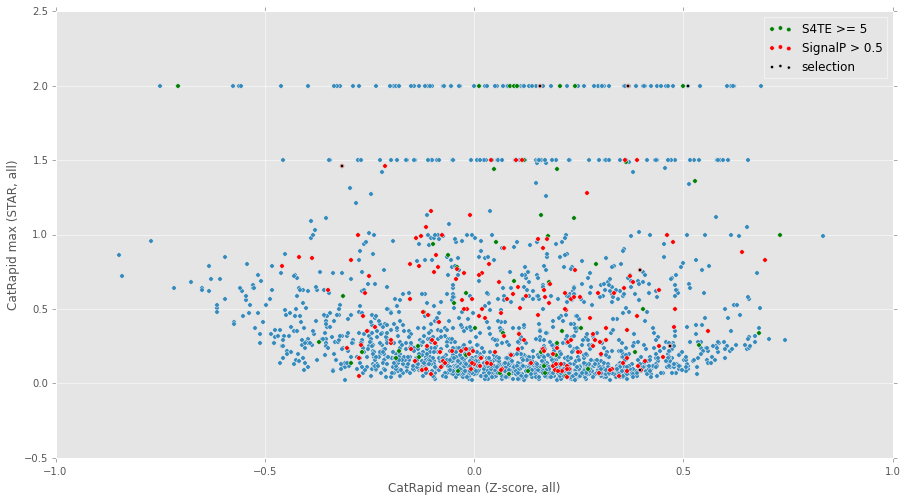

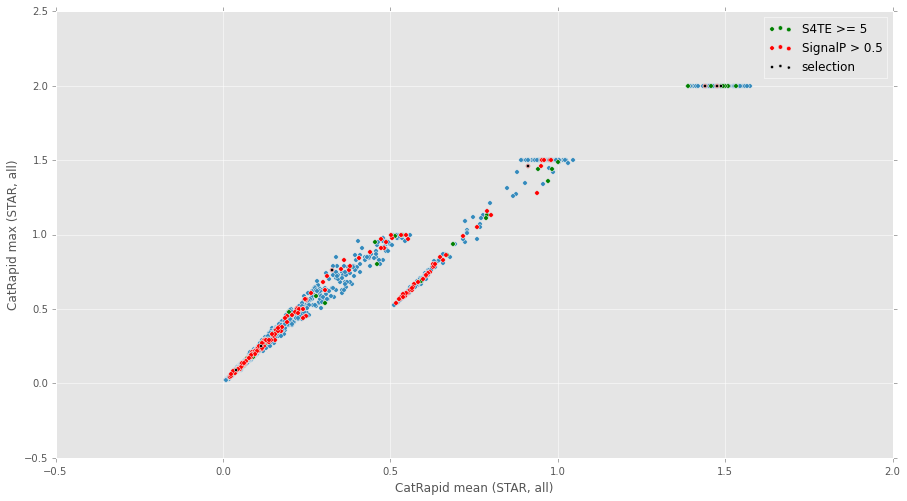

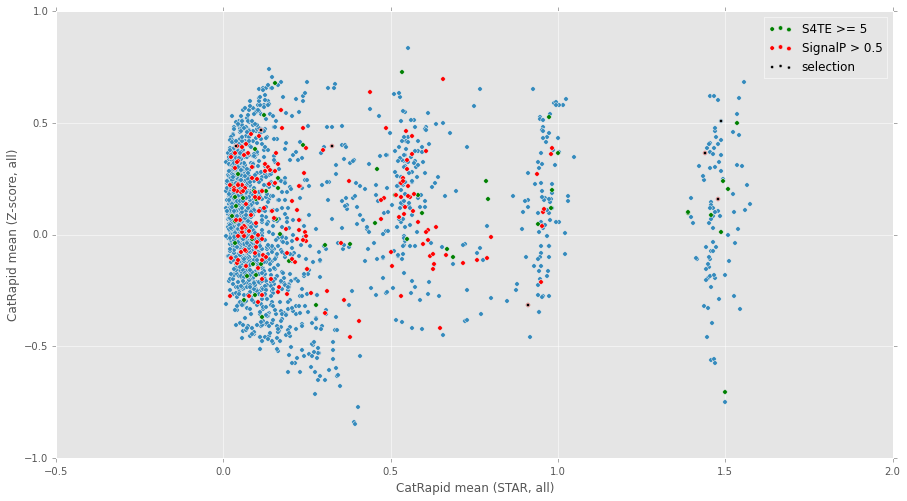

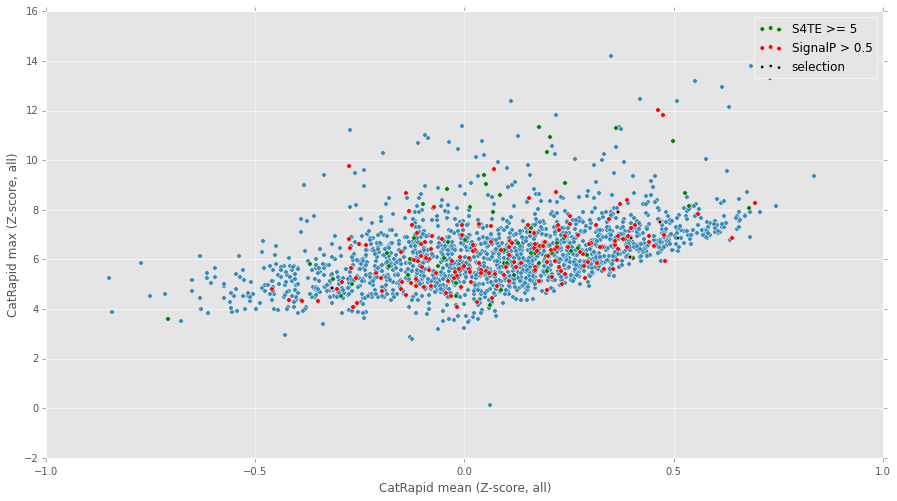

In [15]:
plt_scatter(my_df,'CatRapid mean (Z-score, all)', 'CatRapid max (STAR, all)',
            alternative2 = [my_df['SignalP'] > 0.5, 'SignalP > 0.5'],
            alternative1 = [my_df['S4TE Score'] >= 5, 'S4TE >= 5'],
            selection = selection)

plt_scatter(my_df,'CatRapid mean (STAR, all)', 'CatRapid max (STAR, all)',
            alternative2 = [my_df['SignalP'] > 0.5, 'SignalP > 0.5'],
            alternative1 = [my_df['S4TE Score'] >= 5, 'S4TE >= 5'],
            selection = selection)

plt_scatter(my_df,'CatRapid mean (STAR, all)', 'CatRapid mean (Z-score, all)',
            alternative2 = [my_df['SignalP'] > 0.5, 'SignalP > 0.5'],
            alternative1 = [my_df['S4TE Score'] >= 5, 'S4TE >= 5'],
            selection = selection)

plt_scatter(my_df,'CatRapid mean (Z-score, all)', 'CatRapid max (Z-score, all)',
            alternative2 = [my_df['SignalP'] > 0.5, 'SignalP > 0.5'],
            alternative1 = [my_df['S4TE Score'] >= 5, 'S4TE >= 5'],
            selection = selection)


# Plots for selected Genes

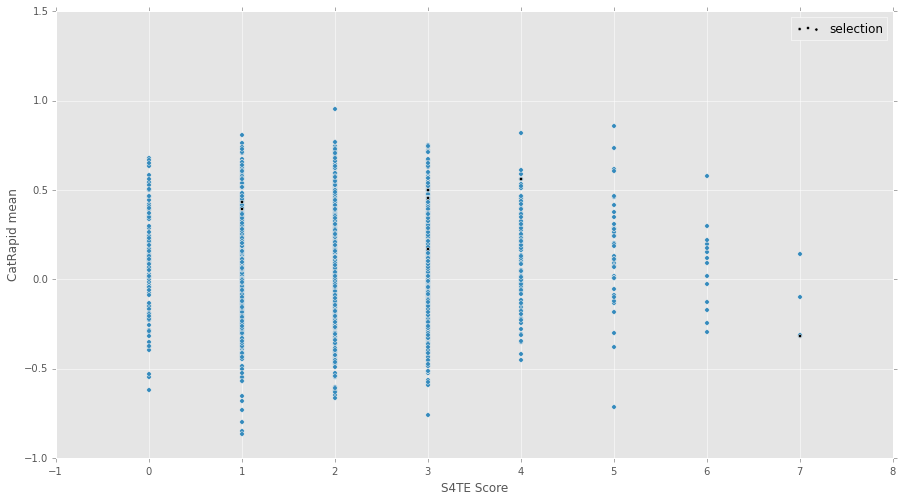

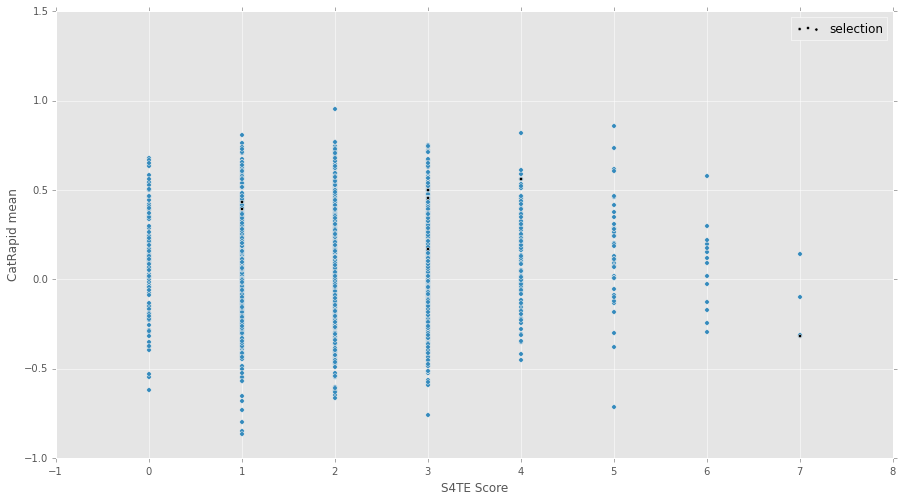

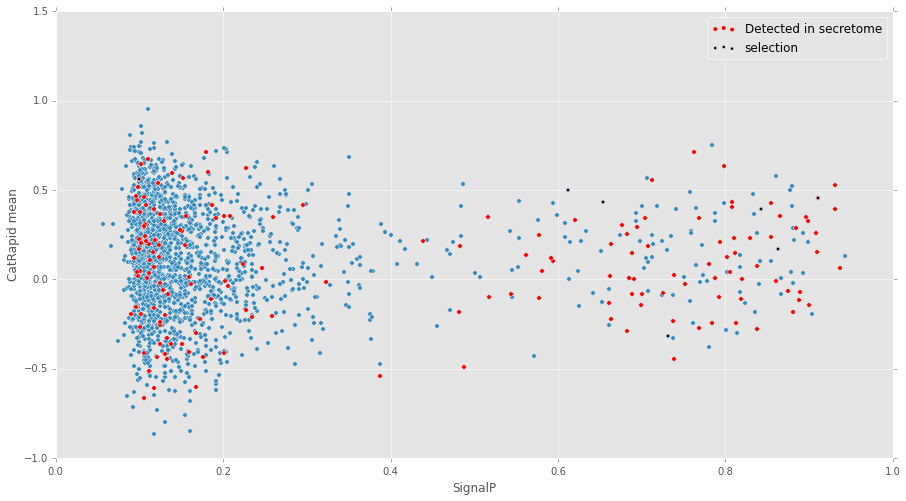

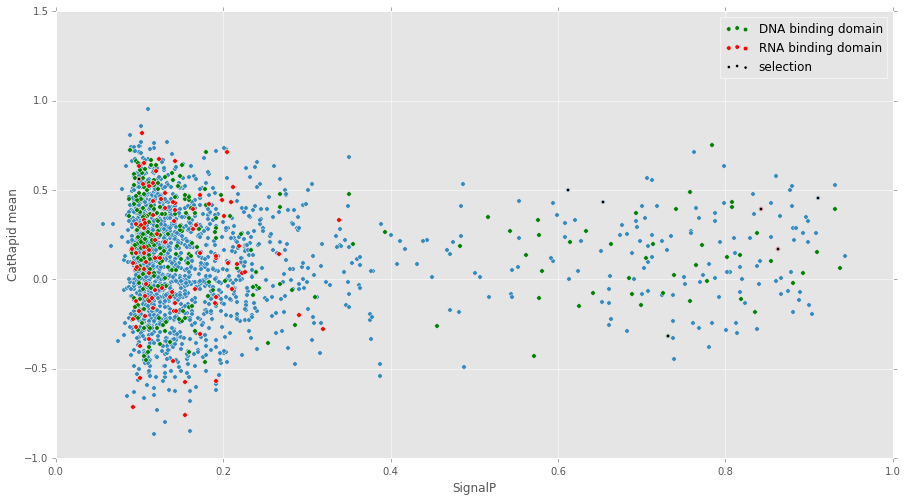

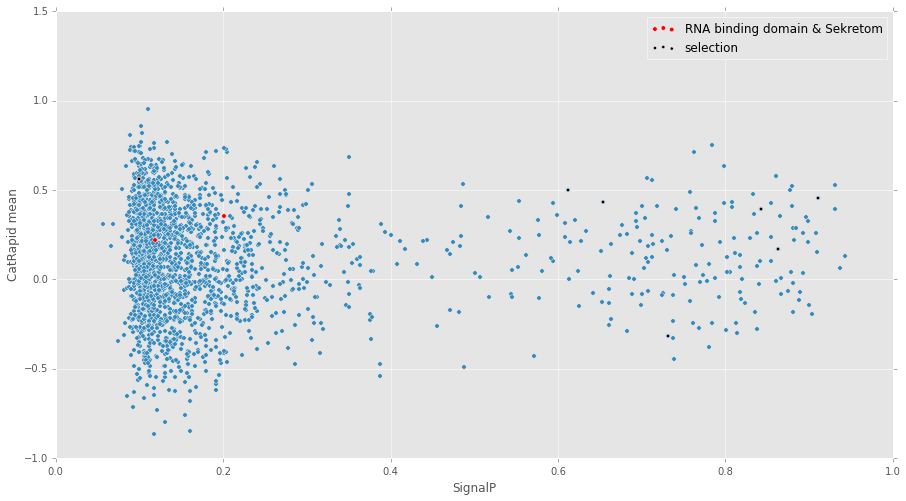

In [20]:
plt_scatter(my_df,'S4TE Score','CatRapid mean',
            selection = selection)

plt_scatter(my_df,'S4TE Score','CatRapid mean',
            selection = selection)

plt_scatter(my_df,'SignalP','CatRapid mean',
            alternative2 = [my_df['Secretion'] == 1, 'Detected in secretome'],
            selection = selection)

plt_scatter(my_df,'SignalP','CatRapid mean',
            alternative1 = [my_df['RNA binding domain'] > 0, 'DNA binding domain'],
            alternative2 = [my_df['RNA binding domain'] == 1, 'RNA binding domain'],
            selection = selection)

plt_scatter(my_df,'SignalP','CatRapid mean',
            alternative2 = [(my_df['RNA binding domain'] == 1)  & my_df['Secretion'] == 1, 'RNA binding domain & Sekretom'],
            selection = selection)

# Correlation plots

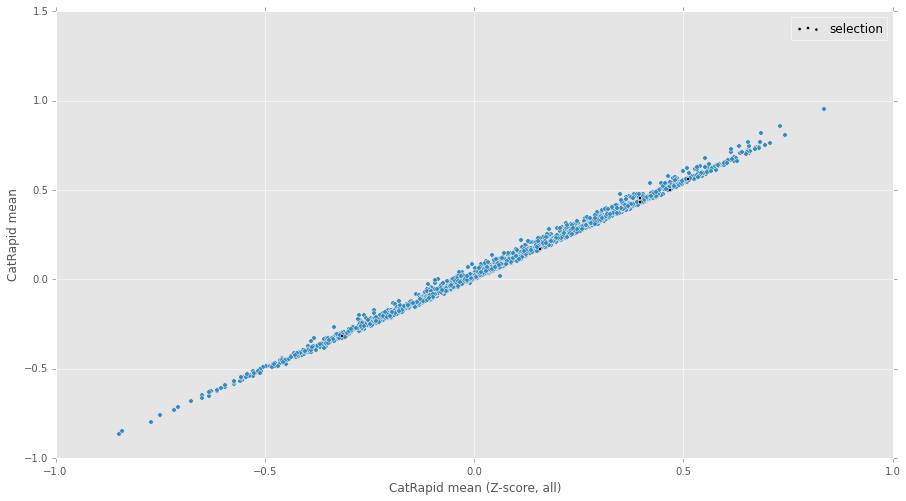

In [11]:
plt_scatter(my_df,'CatRapid mean (Z-score, all)','CatRapid mean',
            selection = selection)

#zanimivi 

CP003496.1_prot_D7S_01630_1489 - NlpD protein (dokazana virulenca pri drugih organizmih, S4TE in SingalP visok) <br/>
CP003496.1_prot_D7S_01363_1244 - competence protein comEA (RBP), signalP, dober STAR <br/>
CP003496.1_prot_D7S_00394_359 - OmpA-like outer membrane protein <br/>
CP003496.1_prot_D7S_00635_578 - excinuclease ABC subunit A (popravljalni mehanizem DNA) <br/>
CP003496.1_prot_D7S_01009_917 - SmpA protein (virulenca pri salmoneli) <br/>
CP003496.1_prot_D7S_00047_46 - integration host factor subunit alpha; RBP, transcriptional and translational control. <br/>
CP003496.1_prot_D7S_00204_189 - protein YgiW; RBP

? CP003496.1_prot_D7S_01384_1265 - DNA polymerase I <br/>
? CP003496.1_prot_D7S_01727_1580 - polynucleotide phosphorylase/polyadenylase <br/>



In [12]:
my_df.to_csv('Results.tsv', sep='\t')

PermissionError: [Errno 13] Permission denied: 'Results.tsv'